# Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

### Load the data into Pandas dataframe

In [ ]:
df = pd.read_csv('../input/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop the columns that are not required for the neural network.

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Understand the distribution better.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

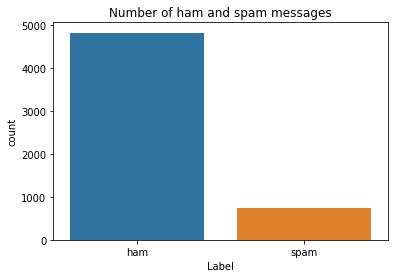

In [ ]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

* Create input and output vectors.
* Process the labels.

In [ ]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

Split into training and test data.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

### Process the data
* Tokenize the data and convert the text to sequences.
* Add padding to ensure that all the sequences have the same shape.
* There are many ways of taking the *max_len* and here an arbitrary length of 150 is chosen.

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
sequences[0]

[26, 31, 161, 161, 118, 37, 9, 127, 216, 42, 41]

In [ ]:
for i in range(10):
    print(len(sequences[i]))

11
5
6
15
5
4
22
2
9
3


In [ ]:
for i in range(10):
    print(len(sequences_matrix[i]))

150
150
150
150
150
150
150
150
150
150


In [ ]:
sequences_matrix[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  26,  31, 161, 161,
       118,  37,   9, 127, 216,  42,  41], dtype=int32)

In [ ]:
len(sequences_matrix[0])

150

In [ ]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### RNN
Define the RNN structure.

In [ ]:
def LSTMmodel():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

Call the function and compile the model.

In [ ]:
import tensorflow as tf

In [ ]:
model = LSTMmodel()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy',tf.keras.metrics.Precision()])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

Fit on the training data.

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 4s 32ms/step - loss: 0.5047 - accuracy: 0.7848 - precision_1: 0.1846 - val_loss: 0.1846 - val_accuracy: 0.9137 - val_precision_1: 1.0000
Epoch 2/10
28/28 [==============================] - 0s 14ms/step - loss: 0.1479 - accuracy: 0.9517 - precision_1: 0.9827 - val_loss: 0.0761 - val_accuracy: 0.9798 - val_precision_1: 0.9900
Epoch 3/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0542 - accuracy: 0.9876 - precision_1: 0.9772 - val_loss: 0.0507 - val_accuracy: 0.9843 - val_precision_1: 0.9722
Epoch 4/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.9876 - precision_1: 0.9597 - val_loss: 0.0602 - val_accuracy: 0.9854 - val_precision_1: 1.0000
Epoch 5/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0276 - accuracy: 0.9928 - precision_1: 0.9802 - val_loss: 0.0536 - val_accuracy: 0.9809 - val_precision_1: 0.9304
Epoch 6/10
28/28 [==============================] - 0s 

The model performs well on the validation set and this configuration is chosen as the final model.

Process the test set data.

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

Evaluate the model on the test set.

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 0s 5ms/step - loss: 0.0805 - accuracy: 0.9830 - precision_1: 0.9370


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.070
  Accuracy: 0.983


In [ ]:
print(' LSTM Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

 LSTM Test set
  Loss: 0.081
  Accuracy: 0.983
